In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [128]:
color_df = pd.read_csv(r"C:\Users\Lenovo\Desktop\gui prj\LEGO\colors.csv")
color_df

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


In [129]:
color_df = color_df.rename(columns={"name":"color"})
color_df

,id,color,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


In [130]:
print(color_df.color.unique)
print(color_df.color.nunique())

<bound method Series.unique of 0                           Unknown
1                             Black
2                              Blue
3                             Green
4                    Dark Turquoise
                   ...             
130    Trans Flame Yellowish Orange
131               Trans Fire Yellow
132          Trans Light Royal Blue
133                   Reddish Lilac
134                      [No Color]
Name: color, Length: 135, dtype: object>
135


In [131]:
color_df.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

# Understanding LEGO Themes vs LEGO Sets
#### Walking into a LEGO store and you will see their products are organised by theme. Their themes include Star Wars, Batman, Harry Poter, and many more.



In [132]:
sets_df = pd.read_csv(r"C:\Users\Lenovo\Desktop\gui prj\LEGO\sets.csv")
sets_df

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


#####  In which year were the first LEGO sets released and what were these sets called?

In [133]:
sets_df = sets_df.sort_values(by="year")
sets_df.iloc[0]


set_num                         700.1-1
name         Extra-Large Gift Set (ABB)
year                               1949
theme_id                            365
num_parts                           142
Name: 9521, dtype: object

##### How many different products did the LEGO company sell in their first year of operation?

In [134]:
sets_df.num_parts[sets_df.year == 1949].count()

5

##### What are the top 5 LEGO sets with the most number of parts? 



In [135]:
sets_df.sort_values(by='num_parts', ascending=False).head().name

15004    The Ultimate Battle for Chima
11183            UCS Millennium Falcon
10551                  Hogwarts Castle
295                          Taj Mahal
221                          Taj Mahal
Name: name, dtype: object

In [136]:
sets_df.iloc[0]

set_num                         700.1-1
name         Extra-Large Gift Set (ABB)
year                               1949
theme_id                            365
num_parts                           142
Name: 9521, dtype: object

#### How many sets LEGO published year on year

In [144]:
by_year = sets_df.groupby('year').count().drop([2020, 2021])
by_year['set_num']

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2015    774
2016    757
2017    786
2018    816
2019    840
Name: set_num, Length: 69, dtype: int64

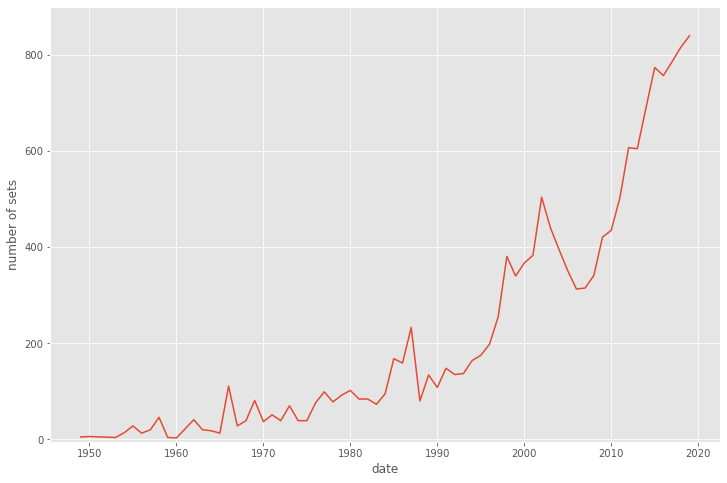

In [138]:
plt.figure(figsize=(12,8))
plt.plot(by_year.index, by_year.name)
plt.xlabel('date')
plt.ylabel('number of sets')
plt.ylim(-5, 900);

#### Number of Themes per Calendar Year

In [139]:
themes = sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})
themes.drop([2020,2021], inplace=True)
themes

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2015,98
2016,92
2017,89


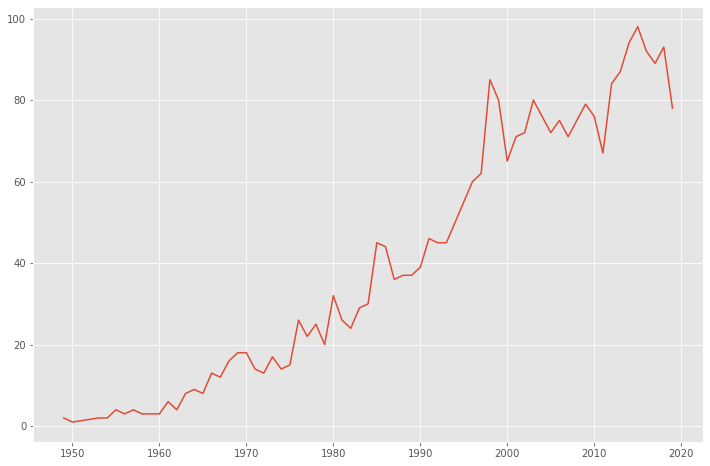

In [140]:
plt.figure(figsize=(12,8))
plt.plot(themes.index, themes.theme_id)

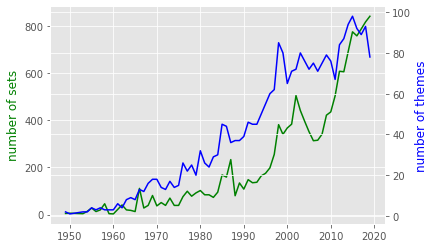

In [157]:
ax1 = plt.gca() 
ax2 = ax1.twinx()
ax1.set_ylabel("number of sets", color = 'green')
ax2.set_ylabel("number of themes", color='blue')
ax1.plot(by_year.index, by_year.name, color='g')
ax2.plot(themes.index, themes.theme_id, color='b');

#### Average Number of Parts per LEGO Set

In [186]:
parts_per_set = sets_df.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


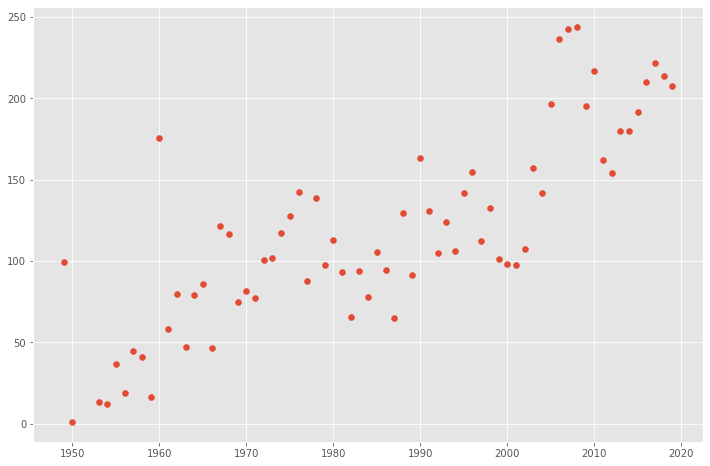

In [187]:
plt.figure(figsize=(12,8))
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2]);

In [177]:
sets_df

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
...,...,...,...,...,...
11289,75290-1,Mos Eisley Cantina,2020,158,0
5147,41430-1,Summer Fun Water Park,2020,494,1012
11337,75550-1,Minions Kung Fu Battle,2021,689,0
11335,75547-1,Minion Pilot in Training,2021,689,0


In [180]:
sets_df.groupby('year').agg({'num_parts': pd.Series.mean})

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


In [270]:
theme_count = sets_df.theme_id.value_counts()
theme_count

158    753
501    656
494    398
435    356
503    329
      ... 
210      1
455      1
383      1
245      1
519      1
Name: theme_id, Length: 571, dtype: int64

<img src="https://i.imgur.com/Sg4lcjx.png">

In [271]:
themes_df = pd.read_csv(r"C:\Users\Lenovo\Desktop\gui prj\LEGO\themes.csv")
themes_df

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0


In [272]:
themes_df[themes_df.name == 'Star Wars']['id']

17      18
150    158
174    209
211    261
Name: id, dtype: int64

In [273]:
for id in themes_df[themes_df.name == 'Star Wars']['id']:
    print(sets_df[sets_df.theme_id == id])

       set_num                                name  year  theme_id  num_parts
12066   8002-1                     Destroyer Droid  2000        18        567
12058   8001-1                        Battle Droid  2000        18        336
12051   8000-1                           Pit Droid  2000        18        223
12071   8007-1                               C-3PO  2001        18        339
12072   8008-1                        Stormtrooper  2001        18        360
15273  K8008-1      Darth Vader / Stormtrooper Kit  2002        18          0
12083   8012-1                  Super Battle Droid  2002        18        378
12081   8011-1                          Jango Fett  2002        18        425
12073   8009-1                               R2-D2  2002        18        239
12074   8010-1                         Darth Vader  2002        18        388
8786   65081-1  R2-D2 / C-3PO Droid Collectors Set  2002        18          1
       set_num                          name  year  theme_id  nu

In [274]:
# Turn theme_count into a DataFrame
theme_count = pd.DataFrame({'id': theme_count.index, 'count': theme_count.values})
theme_count

,id,count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329
...,...,...
566,210,1
567,455,1
568,383,1
569,245,1


In [275]:
merged_df = pd.merge(theme_count, themes_df,on ='id')
merged_df

,id,count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0
...,...,...,...,...
566,210,1,Belville,207.0
567,455,1,Classic Town,454.0
568,383,1,Wooden Box Set,365.0
569,245,1,RC Train,241.0
